In [5]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plots that will be created

pd.options.mode.chained_assignment = None

# Read in the data

df = pd.read_csv(r'C:\Users\Jose\Documents\Workspace\Projects\DataAnalysis\Movies\data\movies.csv')


In [6]:
# Let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
# Check for any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [8]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [13]:
# Changing the data type of columns

df['budget'] = df['budget'].astype('Int64')

df['gross'] = df['gross'].astype('Int64')



In [54]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [16]:
# Correcting the year and create a column

NewDataFrame = df["released"].str.split(" ",n=3,expand = True) 
NewDataFrame.rename(columns={0: "Month", 1: "day",2:"Year",3:"Country"}, inplace=True)
df['yearcorrect'] = NewDataFrame['Year']

In [55]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [64]:
df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [19]:
pd.set_option('display.max_rows', None)

In [63]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [25]:
# Predicting a correlation of High Budget = High Gross
# Predicting a correlation of certain companies = High Gross
# drop any rows with no values
Newdf = df.dropna(axis=0)
print(Newdf.isnull().sum(),'\n')

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget         0
gross          0
company        0
runtime        0
yearcorrect    0
dtype: int64 



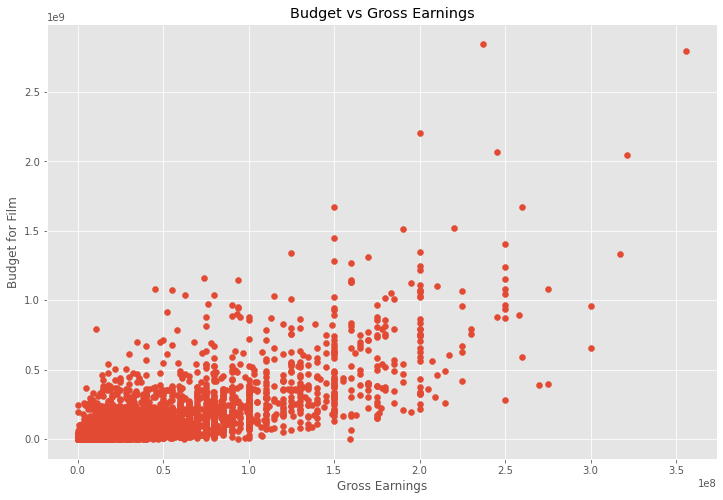

In [29]:
# Scatter Plot with budget vs gross

plt.scatter(x=Newdf['budget'], y=Newdf['gross'])
plt.title('Budget vs Gross Earnings')

plt.ylabel('Budget for Film')

plt.xlabel('Gross Earnings')

plt.show()

In [28]:
Newdf.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


<AxesSubplot:xlabel='budget', ylabel='gross'>

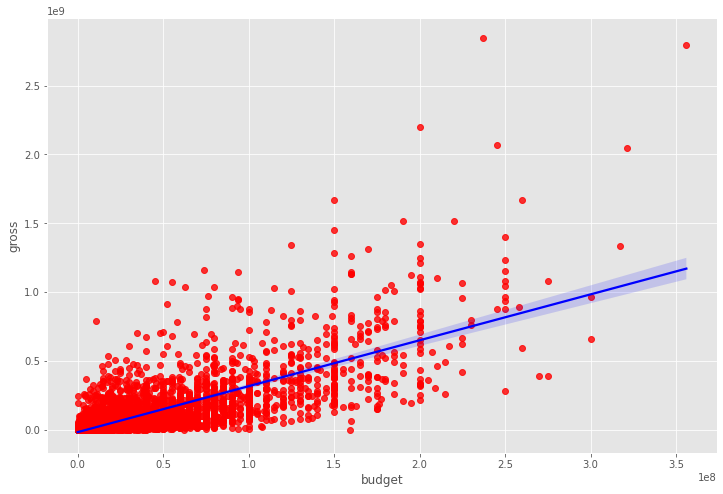

In [39]:
# Plot budget vs gross using seaborn with a correlation line

Newdf['gross'] = Newdf['gross'].astype('float')
Newdf['budget'] = Newdf['budget'].astype('float')

sns.regplot(x="budget", y="gross", data=Newdf, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [40]:
# Let look at different types of correlations

Newdf.corr() #Pearson -> default

,year,score,votes,budget,gross,runtime
year,1.000000,0.056470,0.205827,0.327595,0.274181,0.074963
score,0.056470,1.000000,0.474485,0.072208,0.222715,0.414524
votes,0.205827,0.474485,1.000000,0.439594,0.614705,0.352240
budget,0.327595,0.072208,0.439594,1.000000,0.740218,0.318568
gross,0.274181,0.222715,0.614705,0.740218,1.000000,0.275723
runtime,0.074963,0.414524,0.352240,0.318568,0.275723,1.000000


In [42]:
Newdf.corr(method='kendall') #kendall

,year,score,votes,budget,gross,runtime
year,1.000000,0.039440,0.296179,0.220732,0.239225,0.064779
score,0.039440,1.000000,0.350567,-0.006115,0.125205,0.292681
votes,0.296179,0.350567,1.000000,0.346135,0.553395,0.205274
budget,0.220732,-0.006115,0.346135,1.000000,0.511989,0.231037
gross,0.239225,0.125205,0.553395,0.511989,1.000000,0.176845
runtime,0.064779,0.292681,0.205274,0.231037,0.176845,1.000000


In [43]:
Newdf.corr(method='spearman') #spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.057808,0.427195,0.312677,0.350606,0.095363
score,0.057808,1.000000,0.495942,-0.009548,0.183580,0.412813
votes,0.427195,0.495942,1.000000,0.493256,0.745566,0.300514
budget,0.312677,-0.009548,0.493256,1.000000,0.692871,0.330494
gross,0.350606,0.183580,0.745566,0.692871,1.000000,0.257203
runtime,0.095363,0.412813,0.300514,0.330494,0.257203,1.000000


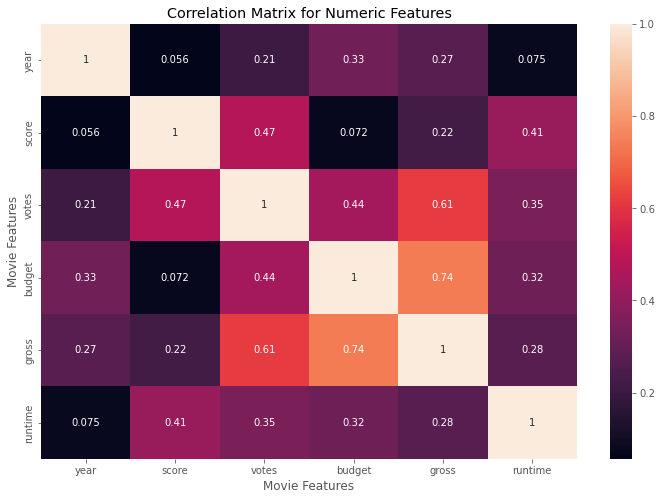

In [45]:
# Correlation is high with budget vs gross

correlation_matrix = Newdf.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.ylabel('Movie Features')

plt.xlabel('Movie Features')

plt.show()

In [46]:
# Let's look at Company

Newdf.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [58]:
df_numerized = Newdf

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4691,6,6,1980,1302,8.4,927000.0,1793,2830,698,46,19000000.0,46998772.0,1424,146.0,2
1,3928,6,1,1980,1125,5.8,65000.0,1576,1157,213,47,4500000.0,58853106.0,451,104.0,2
2,3640,4,0,1980,1357,8.7,1200000.0,756,1817,1156,47,18000000.0,538375067.0,943,124.0,2
3,204,4,4,1980,1125,7.7,221000.0,887,1412,1473,47,3500000.0,83453539.0,1106,88.0,2
4,732,6,4,1980,1168,7.3,108000.0,718,350,270,47,6000000.0,39846344.0,1081,98.0,2


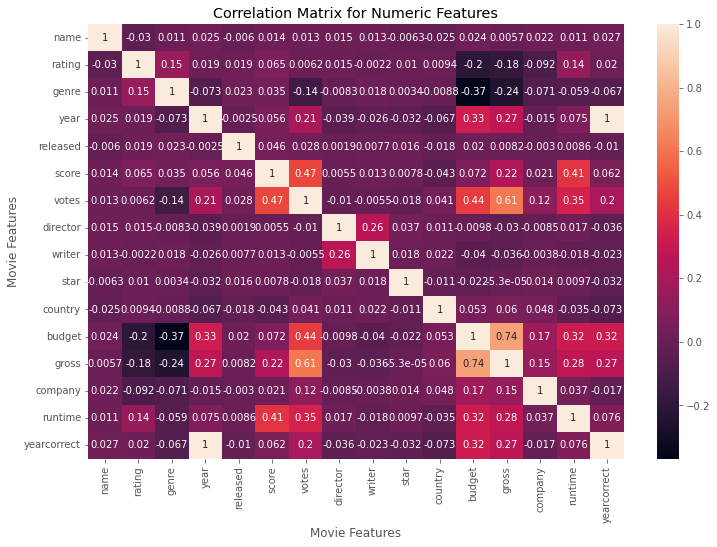

In [48]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.ylabel('Movie Features')

plt.xlabel('Movie Features')

plt.show()

In [49]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.030162,0.010886,0.025443,-0.005970,0.014063,0.012680,0.015257,0.013409,-0.006269,-0.024895,0.023546,0.005697,0.021692,0.011183,0.027075
rating,-0.030162,1.000000,0.147655,0.019428,0.018602,0.065290,0.006198,0.014731,-0.002165,0.010345,0.009422,-0.203809,-0.181912,-0.092471,0.141581,0.020458
genre,0.010886,0.147655,1.000000,-0.072737,0.022810,0.034920,-0.135798,-0.008319,0.017820,0.003438,-0.008826,-0.368370,-0.243954,-0.071025,-0.059014,-0.067160
year,0.025443,0.019428,-0.072737,1.000000,-0.002538,0.056470,0.205827,-0.038665,-0.025967,-0.031956,-0.066937,0.327595,0.274181,-0.014847,0.074963,0.995106
released,-0.005970,0.018602,0.022810,-0.002538,1.000000,0.046243,0.028467,0.001935,0.007665,0.015566,-0.017825,0.019529,0.008157,-0.003044,0.008573,-0.010327
score,0.014063,0.065290,0.034920,0.056470,0.046243,1.000000,0.474485,0.005500,0.013310,0.007793,-0.042515,0.072208,0.222715,0.020750,0.414524,0.061588
votes,0.012680,0.006198,-0.135798,0.205827,0.028467,0.474485,1.000000,-0.010495,-0.005450,-0.017691,0.041377,0.439594,0.614705,0.118300,0.352240,0.202651
director,0.015257,0.014731,-0.008319,-0.038665,0.001935,0.005500,-0.010495,1.000000,0.261765,0.036625,0.010985,-0.009786,-0.029681,-0.008486,0.017332,-0.035709
writer,0.013409,-0.002165,0.017820,-0.025967,0.007665,0.013310,-0.005450,0.261765,1.000000,0.017884,0.021774,-0.039713,-0.036022,-0.003788,-0.017987,-0.022632
star,-0.006269,0.010345,0.003438,-0.031956,0.015566,0.007793,-0.017691,0.036625,0.017884,1.000000,-0.010756,-0.021640,-0.000053,0.014178,0.009714,-0.031881


In [60]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.030162
      genre       0.010886
      year        0.025443
      released   -0.005970
dtype: float64

In [61]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

genre   budget   -0.368370
budget  genre    -0.368370
gross   genre    -0.243954
genre   gross    -0.243954
rating  budget   -0.203809
dtype: float64

In [62]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr.head()

votes        gross     0.614705
gross        votes     0.614705
             budget    0.740218
budget       gross     0.740218
yearcorrect  year      0.995106
dtype: float64

In [ ]:
# Votes and budgets have the highest correlation to gross earnings!